In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import os
import re
root_path = 'log/'

legend_font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }
font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 15,
    }

colorlist = ['darkorange', 'cyan', 'lightsteelblue', 'plum', 'darkseagreen', 'gold', 'bisque', 'lightgreen', 'gray']
color_rgb_list = [(74/255, 135/255, 161/255), (222/255, 144/255, 123/255), (230/255, 197/255, 180/255), (88/255, 141/255, 106/255), (147/255, 196/255, 212/255), (237/255, 204/255, 134/255), (156/255, 131/255, 131/255), (116/255, 126/255, 73/255), (61/255, 71/255, 59/255), (36/255, 74/255, 96/255)]

def extract_number(feature, data, split_str):
    result_list = []
    for line in data:
        #print(line)
        seg = re.split(split_str, line)
        if set(feature).issubset(set(seg)):
            for item in seg:
                if item.lstrip('-').replace('.', '').replace(',', '').isdigit():
                    item = item.replace(',', '')
                    try:
                        result_list.append(int(item))  
                    except ValueError:
                        result_list.append(float(item))  
                        
    return result_list
                
def process_log(root_path, log_path, steps_feature = ['components'], \
                steps_split = ' |\n', val_split = ' |\n|\)|\(|%', val_features = ['set:', 'Accuracy:', 'Test']):
    with open(root_path + log_path, 'r') as f:
        data = f.readlines()
        steps_list = extract_number(feature = steps_feature, data = data, split_str = steps_split)
        val_list = extract_number(feature = val_features, data = data, split_str = val_split) 
    
    
    if abs(len(steps_list) -  len(val_list)) == 1:
        min_len = min(len(steps_list), len(val_list))
        return steps_list[:min_len], val_list[:min_len]
    else:
        return steps_list, val_list

def process_smooth(steps_list, val_list, smooth_len):
    steps = [0] * len(range(0, len(steps_list)-smooth_len+1, smooth_len))
    vals = [0] * len(steps)
    for i in range(0, len(steps_list)-smooth_len+1, smooth_len):
        steps[i // smooth_len]  = steps_list[i+np.argmin(val_list[i:i+smooth_len])]
        vals[i // smooth_len] = np.min(val_list[i:i+smooth_len])
    return steps, vals

In [4]:
def smooth(r_list,plot_list_len,smooth_len):
    plot_list = []
    for i in range(plot_list_len):
        plot_list.append(np.mean(r_list[i*smooth_len:(i+1)*smooth_len]))
    return plot_list

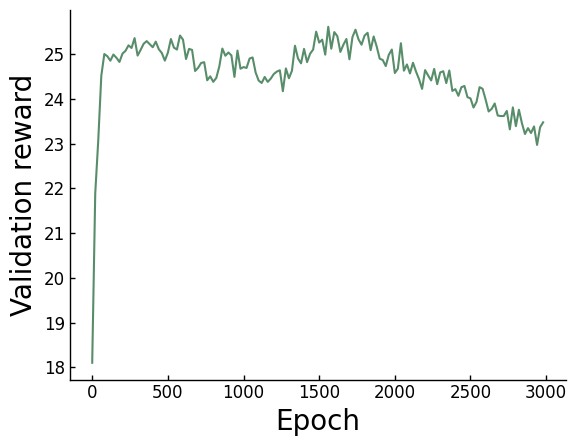

In [56]:
with open(r'log/' + 'A2C2022-12-18-14-21-54', 'r') as f:
    data = f.readlines()
    result_list = []
    for line in data:
        if 'validate reward:' in line:
            seg = re.split(' |\n', line)[-2]
            result_list.append(float(seg))

now=3000
smooth_len = 20
x = np.arange(0,now,1*smooth_len)
y = smooth(result_list[:len(x)*smooth_len],len(x),smooth_len)
steps = np.arange(0,now,1*smooth_len)
plt.figure()
ax = plt.gca().axes

plt.plot(steps,y,color=color_rgb_list[3])
#plt.plot(x,[86.5]*len(x))


plt.xlabel("Epoch",size=20)
plt.ylabel('Validation reward',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.savefig(r'plot/'+'A2C2022-12-17-18-36-15'+'steps_'+'.pdf', dpi=600, format='pdf')
plt.show()

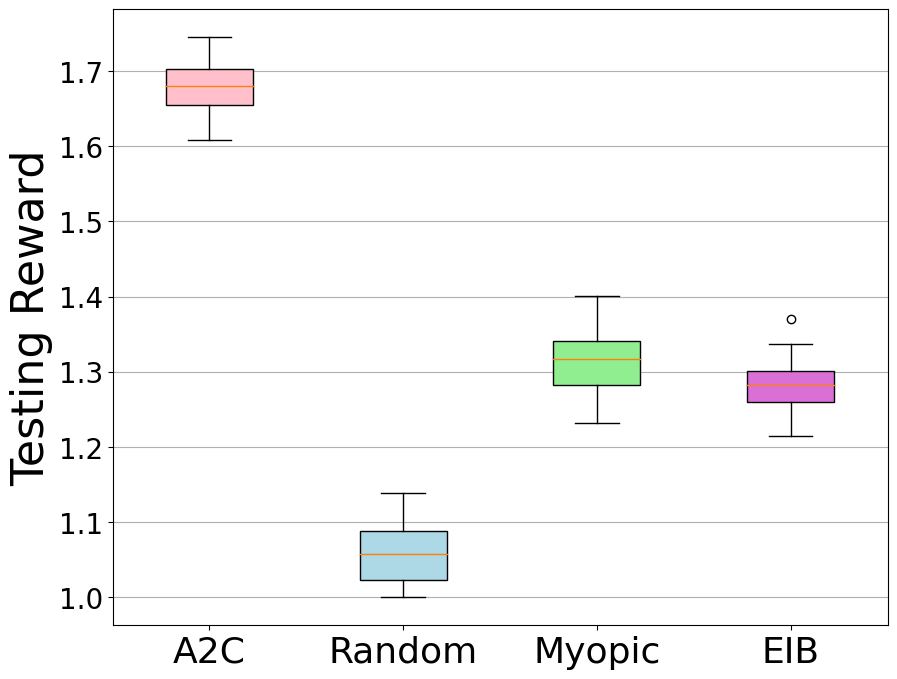

In [68]:
#看benchmark的平均表现
with open(r'log/' + 'A2C2022-12-17-18-37-58', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))

with open(r'log/' + 'A2C2022-12-18-14-21-54', 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-7:]))
min_ = np.min(OA_list)  
data = [np.array(seller_list)/min_, np.array(OA_list)/min_,
                np.array(Myopic_list)/min_, np.array(EIB_list)/min_]

labels = ['A2C', 'Random', 'Myopic', 'EIB']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
# ax1.set_title('Rectangular box plot')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'orchid']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
# adding horizontal grid lines
ax1.yaxis.grid(True)
plt.ylabel('Testing Reward',size=32)
plt.tick_params(axis='x',labelsize=26)
plt.tick_params(axis='y',labelsize=20)
fig.savefig(r'plot/'+'exA2C2022-12-18-14-21-54'+'.pdf',dpi=600, format='pdf')            



In [62]:
with open(r'log/' + 'A2C2022-12-17-18-37-58', 'r') as f:
    data = f.readlines()
    OA_list = []
    Myopic_list = []
    EIB_list = []
    for line in data:
        if 'mean test reward:' in line:
            OA_list.append(float(line.split(',')[-3]))
            Myopic_list.append(float(line.split(',')[-2]))
            EIB_list.append(float(line.split(',')[-1]))
np.mean(EIB_list)

19.599020000000003

In [63]:
np.mean(Myopic_list)

20.122909999999997

In [64]:
np.mean(OA_list)

16.195375000000002

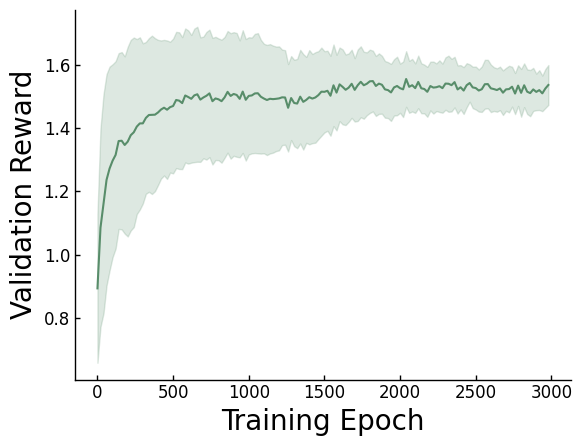

In [70]:
log_list = ['A2C2022-12-17-18-36-15','A2C2022-12-18-10-21-47','A2C2022-12-18-14-21-54']#
now=3000
smooth_len = 20
for ind,log in enumerate(log_list):
    with open(r'log/' + log, 'r') as f:
        data = f.readlines()
        result_list = []
        for line in data:
            if 'validate reward:' in line:
                seg = re.split(' |\n', line)[-2]
                result_list.append(float(seg))
    steps = np.arange(0,now,1*smooth_len)
    y = smooth(result_list[:len(steps)*smooth_len],len(steps),smooth_len)/min_
    if ind==0:
        vals = np.array(y)
    else:
        vals = np.vstack((vals, y))

plt.figure()
ax = plt.gca().axes
plt.plot(steps, vals.mean(axis = 0), color=color_rgb_list[3])
r1 = list(map(lambda x: x[0]-x[1], zip(vals.mean(axis = 0), vals.std(axis = 0))))
r2 = list(map(lambda x: x[0]+x[1], zip(vals.mean(axis = 0), vals.std(axis = 0))))
ax.fill_between(steps, r1, r2, color=color_rgb_list[3], alpha=0.2)


'''
plt.plot(x,y,color=color_rgb_list[3])
#plt.plot(x,[86.5]*len(x))
'''

plt.xlabel("Training Epoch",size=20)
plt.ylabel('Validation Reward',size=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1);####设置左边坐标轴的粗细
ax.tick_params(direction='in', width=1)
#ax.tick_params(fontsize=18)
plt.xticks(size=12)
plt.yticks(size=12)
plt.savefig(r'plot/'+'exsteps_'+'.pdf', dpi=600, format='pdf',bbox_inches = 'tight')
plt.show()

In [65]:

with open(r'log/' + 'A2C2022-12-18-14-21-54', 'r') as f:
    data = f.readlines()
    seller_list = []
    for line in data:
        if 'mean test reward:' in line:
            seller_list.append(float(line.split(',')[-4][-7:]))

np.mean(seller_list)

25.671284999999994

In [66]:
(25.67-20.12)/20.12

0.275844930417495